In [2]:
import os
from moviepy.editor import *

def extract_frames(movie, times, imgdir, prefix):
    clip = VideoFileClip(movie)
    for t in times:
        imgpath = os.path.join(imgdir, '{}{}.png'.format(prefix,t))
        clip.save_frame(imgpath, t)

In [3]:
movie = 'input_videos/challenge_video.mp4'
imgdir = 'test_images'
times = [16]
prefix = 'x_challenge_video'

extract_frames(movie, times, imgdir, prefix)

In [18]:
movie = 'input_videos/harder_challenge_video.mp4'
imgdir = 'test_images'
times = [22]
prefix = 'x_harder_challenge_video'

extract_frames(movie, times, imgdir, prefix)

In [155]:
movie = 'input_videos/project_video.mp4'
imgdir = 'test_images'
times = [0]
prefix = 'x_project_video'

extract_frames(movie, times, imgdir, prefix)

In [5]:
import sklearn
sklearn.__version__

'0.19.2'

In [7]:

import numpy as np
from sklearn import linear_model, datasets

In [120]:
n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

y = 0.001*y**2 + y
# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

y = y + 1000
# Fit line using all data
model = linear_model.LinearRegression()
model.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac.fit(X, y)
inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(-5, 5)
line_y = model.predict(line_X[:, np.newaxis])
line_y_ransac = model_ransac.predict(line_X[:, np.newaxis])

In [121]:
model_ransac.estimator_.coef_

array([81.93432955])

In [122]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
%matplotlib inline

In [123]:
line_X

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4])

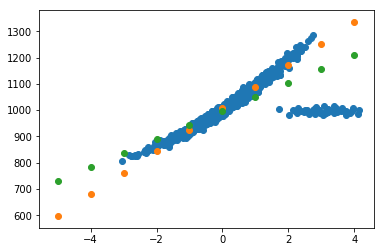

In [124]:
plt.scatter(X,y)
plt.scatter(line_X, line_y_ransac)  
plt.scatter(line_X, line_y)  

In [125]:
X1D = [el for l in X for el in l ]
fit = np.polyfit(X1D, y, 2, full=True)
fit

(array([ -14.10157414,   66.82887096, 1015.45165941]),
 array([1449692.95830744]),
 3,
 array([1.31156334, 0.95126594, 0.61228646]),
 2.220446049250313e-13)

In [132]:
X2 = [[el**2, el] for arr in X for el in arr]
model_ransac2 = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac2.fit(X2, y)

fit_ransac = model_ransac2.estimator_.coef_
fit_ransac = [fit_ransac[0],fit_ransac[1],fit[0][2]]

In [141]:
model_ransac2.estimator_.coef_

array([ 7.5589679 , 82.59790008])

In [146]:
model_ransac2.estimator_.intercept_

1000.0483813633067

In [152]:
s = np.append(model_ransac2.estimator_.coef_, model_ransac2.estimator_.intercept_)

s

array([   7.5589679 ,   82.59790008, 1000.04838136])

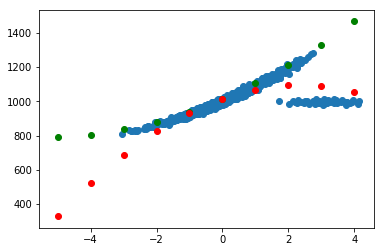

In [133]:
# Predict data of estimated models
line_X = np.arange(-5, 5)
line_y = np.polyval(fit[0], line_X)
#line_y_ransac = model_ransac2.predict(line_X[:, np.newaxis])
line_y_ransac = np.polyval(fit_ransac, line_X)

plt.scatter(X,y)
plt.scatter(line_X, line_y_ransac, color='green')  
plt.scatter(line_X, line_y, color='red')  

In [37]:
np.arange(-5, 5)

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4])

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


In [101]:
m = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', linear_model.LinearRegression())])
m

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [102]:
model=model.fit(X, y)


In [105]:
model.coef_[1]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [97]:
list(params.values())


[1, True, True, False]